In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/P1_Final/"
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P1_Final
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=a0eb2abae723766977076bf84e812d6929f9b4eab6beb3d4b96d16a85d1c4141
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from plotlib_helper.ipynb
importing Jupyter notebook from datapreprocess_helper.ipynb


In [3]:
import pandas as pd
import io
import requests
import os
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

path = "/content/drive/My Drive/P1_Final/"
    
filepath_train = os.path.join(path,"data/UNSW_NB15_training-set_csc215.csv") 
filepath_test = os.path.join(path,"data/UNSW_NB15_test-set_csc215.csv") 

df_train= pd.read_csv(filepath_train, na_values=['NA','?','-'])
df_test= pd.read_csv(filepath_test, na_values=['NA','?','-'])
print(df_train.shape)
print(df_test.shape)

(175341, 45)
(82332, 45)


In [4]:
# dropping any rows with null values in training and testing data
df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

print(df_train.shape)
print(df_test.shape)

# drop id column
df_train.drop(columns=['id'], axis= 1, inplace=True)
df_test.drop(columns=['id'], axis= 1, inplace=True)

df_train[0:5]

(81173, 45)
(35179, 45)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
11,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0,Normal,0
15,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
17,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0,Normal,0
21,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0,Normal,0


In [5]:
#one hot encoding for categorical columns
categorical_cols =['proto', 'state', 'service', 'attack_cat']
non_normalize_cols = ['is_sm_ips_ports', 'is_ftp_login', 'label']

for col in df_train.columns:
  if col not in categorical_cols and col not in non_normalize_cols:
    dataprep.encode_numeric_zscore(df_train, col)

for col in df_test.columns:
  if col not in categorical_cols and col not in non_normalize_cols:
    dataprep.encode_numeric_zscore(df_test, col)

for col in categorical_cols:
  dataprep.encode_text_dummy(df_train, col)
  dataprep.encode_text_dummy(df_test, col)

# shape of train and test data frames after encoding
print(df_train.shape, df_test.shape)
df_train[0:5]

(81173, 68) (35179, 67)


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto-tcp,proto-udp,state-CON,state-FIN,state-INT,state-REQ,state-RST,service-dhcp,service-dns,service-ftp,service-ftp-data,service-http,service-irc,service-pop3,service-radius,service-smtp,service-snmp,service-ssh,service-ssl,attack_cat-Analysis,attack_cat-Backdoor,attack_cat-DoS,attack_cat-Exploits,attack_cat-Fuzzers,attack_cat-Generic,attack_cat-Normal,attack_cat-Reconnaissance,attack_cat-Worms
3,0.174677,-0.048030,-0.044580,-0.055932,-0.077782,-0.624123,-1.042527,1.554587,-0.610101,-0.216534,-0.061567,-0.055844,0.465346,0.190108,-0.125318,0.921565,1.185734,0.159327,0.116305,1.185734,-0.548899,-0.511111,-0.542046,-0.358947,-0.230851,-0.197312,-0.057780,-0.931741,-0.340489,-0.811222,-0.817648,-0.890285,-0.790888,1,5.266767,-0.278273,-0.855604,-0.927297,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,0.266079,0.216764,0.076680,0.169685,-0.069496,-0.623956,-1.042527,1.554587,-0.607521,-0.211838,0.228984,0.022395,-0.036952,0.131492,0.015802,-0.156252,1.185734,0.698403,-0.024568,1.185734,1.387128,0.976391,1.689012,3.682398,-0.171035,-0.197312,-0.057780,-0.857352,-0.340489,-0.911291,-0.817648,-0.890285,-0.865254,0,-0.175733,-0.278273,-0.955804,-0.927297,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
15,-0.198900,-0.100988,-0.135525,-0.057916,-0.082207,2.287049,0.822646,-0.717582,2.795841,-0.219823,-0.072328,-0.102787,-0.182312,-0.159170,-0.137528,-0.179661,-0.843349,-0.672360,-0.673920,-0.843349,-0.548899,-0.511111,-0.542046,-0.278781,-0.486063,-0.197312,-0.057780,-0.931741,0.851546,-0.911291,-0.817648,-0.890285,-0.716523,0,-0.175733,-0.278273,-0.855604,-0.927297,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
17,-0.111472,-0.058621,-0.074895,-0.054992,-0.075909,-0.623952,-1.042527,1.554587,-0.609941,-0.200730,-0.050806,-0.071491,0.002937,0.025344,-0.037382,-0.163820,1.185734,2.244595,1.652802,1.185734,1.227288,1.155081,1.199529,-0.198614,0.060251,0.689287,-0.056479,-0.782963,-0.340489,-0.911291,-0.817648,-0.890285,-0.865254,0,-0.175733,0.719265,-0.955804,-0.778749,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21,-0.123810,-0.058621,-0.090052,-0.054433,-0.080667,-0.623945,0.822646,1.554587,-0.609873,-0.214631,-0.050806,-0.087139,-0.033117,0.059835,-0.046634,-0.161566,1.185734,1.330366,1.982709,1.185734,1.731003,1.039913,2.288498,-0.132594,-0.306617,0.689287,-0.057780,-0.559796,-0.340489,-0.911291,-0.817648,-0.890285,-0.939620,0,-0.175733,0.719265,-0.855604,-0.778749,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
# retaining only the common columns
common_col = (df_train.columns) & (df_test.columns) 
df_train = df_train[common_col]
df_test = df_test[common_col]
print("Data frame shape after removing non-common columns",df_train.shape, df_test.shape)


Data frame shape after removing non-common columns (81173, 66) (35179, 66)


In [7]:

X_train = df_train.drop('label', axis=1)
X_train = X_train.to_numpy()
Y_train = df_train['label']
Y_train = Y_train.to_numpy()

print(X_train.shape)
print(Y_train.shape)

X_test = df_test.drop(columns='label', axis=1)
X_test = X_test.to_numpy()
Y_test = df_test['label']
Y_test = Y_test.to_numpy()


print(X_test.shape)
print(Y_test.shape)

(81173, 65)
(81173,)
(35179, 65)
(35179,)


In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression(solver='sag',multi_class="ovr", class_weight='balanced',max_iter=100000) # solver changed to sag since large dataset is being used
# fit the model with data
logreg.fit(X_train, Y_train)

# predict the response for new observations
pred = logreg.predict(X_test)
print(pred)

[0 0 0 ... 0 0 0]


Performance Metrics - Logistic Regression
---------------------------------------
Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


[[ 9625     0]
 [    0 25554]]


Plotting confusion matrix


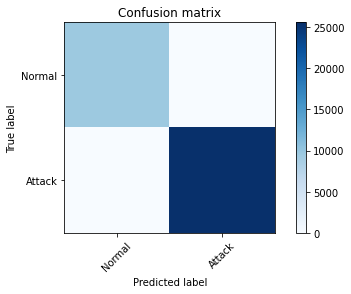



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9625
           1       1.00      1.00      1.00     25554

    accuracy                           1.00     35179
   macro avg       1.00      1.00      1.00     35179
weighted avg       1.00      1.00      1.00     35179




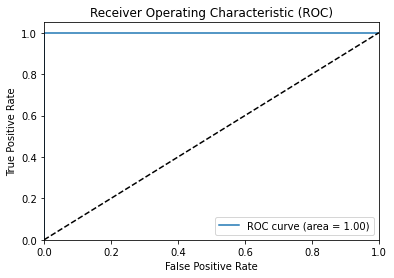

In [9]:
plotROC = True
isNeuralNet = False
graphplot.performance_metrics(pred, Y_test, ["Normal", "Attack"], "Performance Metrics - Logistic Regression", plotROC, isNeuralNet)
